1.Load data
2.Audit data
3.Data prepration adna data transformation
4.Data Visualization(Understand the distribution of the data)
5.Data Analysis
    1.UNI-VARIATE
    2.BI-Variate
    3.Multi-variate
        1.Classification
            1.KNN
            2.Logistic Regression
            3.RF
            4.GB Boost(XGB)
    4.Compare results
    5.Create an App

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import   train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency

## IMPORT DATA

In [2]:
df=pd.read_csv('D:\Google Drive\imarticus python\Arul Sir\KNN\Mobile_data.csv')

In [3]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [6]:
df.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4aadf1490>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4aadf1af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4aadf12e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4aadf1fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4aae042e0>],
 'means': []}

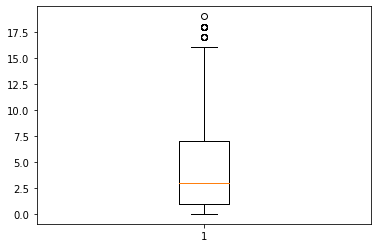

In [7]:
plt.boxplot(df['fc'])

In [8]:
# sns.pairplot(df)

<AxesSubplot:>

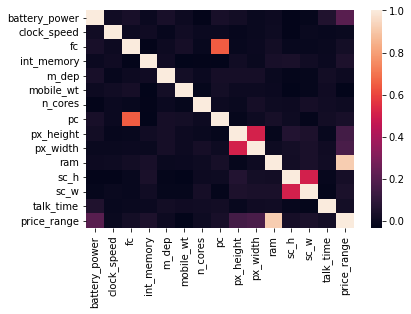

In [9]:
sns.heatmap(df.corr())

## DATA DIVIDE INTO X & Y AND TRAIN & TEST

In [10]:
x=df.iloc[:,:-1]
y=df['price_range']

In [11]:
print(x.shape)
print(y.shape)

(2000, 14)
(2000,)


In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [13]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


In [14]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
pred_train_lgr=lgr.predict(xtrain)
pred_test_lgr=lgr.predict(xtest)

In [16]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [17]:
acc_report(ytrain,pred_train_lgr)

the accuracy of tha model is  0.6275
[[311  83   4   0]
 [ 71 214  85  25]
 [  1  98 174 132]
 [  0   4  93 305]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       398
           1       0.54      0.54      0.54       395
           2       0.49      0.43      0.46       405
           3       0.66      0.76      0.71       402

    accuracy                           0.63      1600
   macro avg       0.62      0.63      0.62      1600
weighted avg       0.62      0.63      0.62      1600



In [18]:
acc_report(ytest,pred_test_lgr)

the accuracy of tha model is  0.67
[[78 22  2  0]
 [11 57 31  6]
 [ 0 17 49 29]
 [ 0  0 14 84]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       102
           1       0.59      0.54      0.57       105
           2       0.51      0.52      0.51        95
           3       0.71      0.86      0.77        98

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



## DECIOSION TREE IMPLEMENTATION

In [19]:
dt=DecisionTreeClassifier(max_depth=5,min_samples_split=4)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [20]:
pred_train_dt=dt.predict(xtrain)
pred_test_dt=dt.predict(xtest)

In [21]:
acc_report(ytrain,pred_train_dt)

the accuracy of tha model is  0.88
[[368  30   0   0]
 [ 21 333  41   0]
 [  0  42 340  23]
 [  0   0  35 367]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       398
           1       0.82      0.84      0.83       395
           2       0.82      0.84      0.83       405
           3       0.94      0.91      0.93       402

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



In [22]:
acc_report(ytest,pred_test_dt)

the accuracy of tha model is  0.8325
[[90 12  0  0]
 [10 80 15  0]
 [ 0  8 78  9]
 [ 0  0 13 85]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       102
           1       0.80      0.76      0.78       105
           2       0.74      0.82      0.78        95
           3       0.90      0.87      0.89        98

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



## RANDOM FOREST CLASSIFICATION

In [23]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [24]:
pred_test_rf=rf.predict(xtest)
pred_train_rf=rf.predict(xtrain)

In [25]:
acc_report(ytrain,pred_train_rf)

the accuracy of tha model is  1.0
[[398   0   0   0]
 [  0 395   0   0]
 [  0   0 405   0]
 [  0   0   0 402]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       405
           3       1.00      1.00      1.00       402

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [26]:
acc_report(ytest,pred_test_rf)

the accuracy of tha model is  0.8975
[[97  5  0  0]
 [ 6 87 12  0]
 [ 0  6 85  4]
 [ 0  0  8 90]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.89      0.83      0.86       105
           2       0.81      0.89      0.85        95
           3       0.96      0.92      0.94        98

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



## IMPLEMENTATION OF ADABOOST

In [27]:
ada=AdaBoostClassifier(n_estimators=150,learning_rate=0.9523)
ada.fit(xtrain,ytrain)
pred_train_ada=ada.predict(xtrain)
pred_test_ada=ada.predict(xtest)

In [28]:
acc_report(ytrain,pred_train_ada)

the accuracy of tha model is  0.795
[[288 110   0   0]
 [ 40 316  39   0]
 [  0  37 315  53]
 [  0   0  49 353]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       398
           1       0.68      0.80      0.74       395
           2       0.78      0.78      0.78       405
           3       0.87      0.88      0.87       402

    accuracy                           0.80      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.80      0.80      0.80      1600



In [29]:
acc_report(ytest,pred_test_ada)

the accuracy of tha model is  0.8025
[[79 23  0  0]
 [ 9 78 18  0]
 [ 0  6 74 15]
 [ 0  0  8 90]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       102
           1       0.73      0.74      0.74       105
           2       0.74      0.78      0.76        95
           3       0.86      0.92      0.89        98

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



## GRADIENT BOOSTING ALGORITHM

In [30]:
gb=GradientBoostingClassifier(learning_rate=0.9445)
gb.fit(xtrain,ytrain)
pred_gb_train=gb.predict(xtrain)
pred_gb_test=gb.predict(xtest)

In [31]:
acc_report(ytrain,pred_gb_train)

the accuracy of tha model is  1.0
[[398   0   0   0]
 [  0 395   0   0]
 [  0   0 405   0]
 [  0   0   0 402]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       405
           3       1.00      1.00      1.00       402

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [32]:
acc_report(ytest,pred_gb_test)

the accuracy of tha model is  0.9075
[[98  4  0  0]
 [ 5 92  8  0]
 [ 0  7 81  7]
 [ 0  1  5 92]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       102
           1       0.88      0.88      0.88       105
           2       0.86      0.85      0.86        95
           3       0.93      0.94      0.93        98

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



# KNN

In [33]:
np.sqrt(2000)

44.721359549995796

In [34]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(xtrain,ytrain)
pred_knn_train=knn.predict(xtrain)
pred_knn_test=knn.predict(xtest)

In [35]:
acc_report(ytrain,pred_knn_train)

the accuracy of tha model is  0.931875
[[389   9   0   0]
 [ 17 361  17   0]
 [  0  21 366  18]
 [  0   0  27 375]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       398
           1       0.92      0.91      0.92       395
           2       0.89      0.90      0.90       405
           3       0.95      0.93      0.94       402

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [36]:
acc_report(ytest,pred_knn_test)

the accuracy of tha model is  0.93
[[100   2   0   0]
 [  3  97   5   0]
 [  0   4  85   6]
 [  0   0   8  90]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.94      0.92      0.93       105
           2       0.87      0.89      0.88        95
           3       0.94      0.92      0.93        98

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [37]:
# %pip install Gradio

In [38]:
import pickle
import gradio as gr

In [39]:
with open('knn_model.pkl','wb') as f:
    pickle.dump(knn,f)

In [40]:
x.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [41]:
def make_prediction(battery_power, clock_speed, fc, int_memory,m_dep,mobile_wt, n_cores, pc, px_height,px_width,ram,sc_h,sc_w,talk_time):
    with open('knn_model.pkl','rb')as f:
        clf=pickle.load(f)
        pred=clf.predict([[battery_power, clock_speed, fc, int_memory,m_dep,mobile_wt, n_cores, pc, px_height,px_width,ram,sc_h,sc_w,talk_time]])
    if pred==0:
        return('Low cost')
    elif pred==1:
        return('Low-median cost')
    elif pred==2:
        return('medium-high Cost')
    else:
        return('High Cost')

In [42]:
battery_power=gr.Number(label='Enter battery power between 500-2000')
clock_speed = gr.Number(label='Enter clock_speed between 0.5-3')
fc=gr.Number(label='Enter fc between 0.19')
int_memory=gr.Number(label='Enter int_memory between 2-64')
m_dep=gr.Number(label='Enter m_dep between 0.1-1')
mobile_wt=gr.Number(label='Enter mobile_wt 80-200')
n_cores=gr.Number(label='Enter n_cores 1-8')
pc=gr.Number(label='Enter pc 500-2000')
px_height=gr.Number(label='Enter px_height 0-1988')
px_width=gr.Number(label='Enter px_width 500-1988')
ram=gr.Number(label='Enter value between 256-3998')
sc_h=gr.Number(label='Enter a value for screen height between 5-19')
sc_w=gr.Number(label='Enter a value for screen width between 0-18')
talk_time=gr.Number(label='Enter value between  2-20')

# WE CREATE THE OUTPUT
output=gr.Textbox()



In [43]:
app=gr.Interface(fn=make_prediction,inputs=[battery_power, clock_speed, fc, int_memory,m_dep,mobile_wt, n_cores, pc, px_height,px_width,ram,sc_h,sc_w,talk_time],outputs=output)
app.launch(debug=True)  

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.


## XG BOOST CLASSIFIER

In [ ]:
# %pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
import xgboost as xgb

In [45]:
dtrain_clf=xgb.DMatrix(xtrain,ytrain)
dtest_clf=xgb.DMatrix(xtest,ytest)

In [46]:
# the data type is changed in array because DataFrame will be slow in these case

type(dtrain_clf)

xgboost.core.DMatrix

In [47]:
# type(xtrain)

In [48]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100,tree_methods='hist')
xgb_classifier.fit(xtrain,ytrain)

[19:27:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "tree_methods" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [49]:
xgb_pred_train=xgb_classifier.predict(xtrain)
xgb_pred_test=xgb_classifier.predict(xtest)

In [50]:
acc_report(ytrain,xgb_pred_train)

the accuracy of tha model is  1.0
[[398   0   0   0]
 [  0 395   0   0]
 [  0   0 405   0]
 [  0   0   0 402]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       405
           3       1.00      1.00      1.00       402

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [51]:
acc_report(ytest,xgb_pred_test)

the accuracy of tha model is  0.925
[[99  3  0  0]
 [ 4 96  5  0]
 [ 0  5 82  8]
 [ 0  0  5 93]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       102
           1       0.92      0.91      0.92       105
           2       0.89      0.86      0.88        95
           3       0.92      0.95      0.93        98

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400

